### Titanic Data Visualization Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Titanic dataset
df = sns.load_dataset('titanic')  # Adjust path as needed
print(f"Dataset shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum()}")
df

Dataset shape: (891, 15)
Missing values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
df['age'] = df['age'].fillna(df['age'].median())
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])


## 1. Survival Distribution by Passenger Class (Matplotlib)

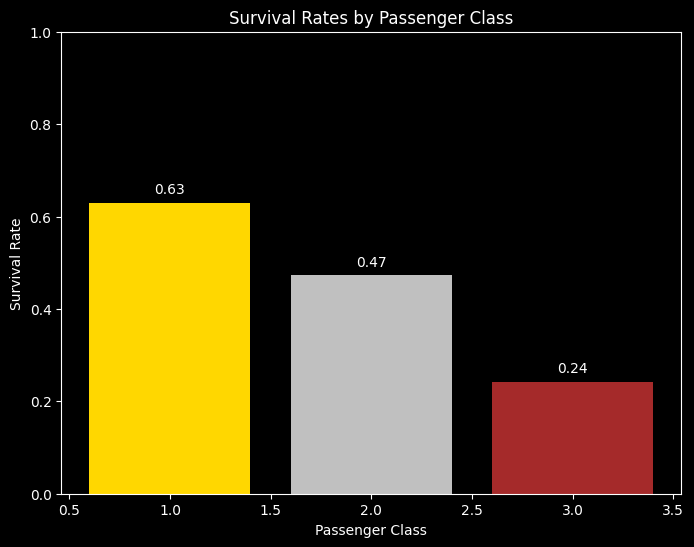

In [3]:

# Calculate survival rates per class (normalized)
survival_rates = df.groupby('pclass')['survived'].mean()

plt.figure(figsize=(8, 6))
plt.bar(survival_rates.index, survival_rates.values, color=['gold', 'silver', 'brown'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Passenger Class')
plt.ylim(0, 1)
for i, v in enumerate(survival_rates.values):
    plt.text(i+1, v+0.02, f'{v:.2f}', ha='center')
plt.show()

## 2. Gender Survival: Seaborn's Countplot

C:\Users\prani\AppData\Local\Temp\ipykernel_50904\2692719454.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='sex', hue='survived', data=df, order=['male', 'female'],


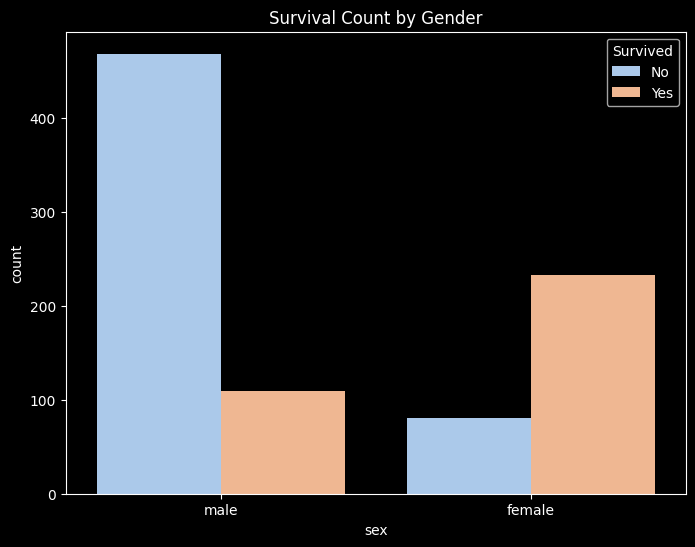

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=df, order=['male', 'female'], 
              palette=sns.color_palette("pastel"))
plt.title('Survival Count by Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

## 3. Age Distribution: Histogram with Matplotlib

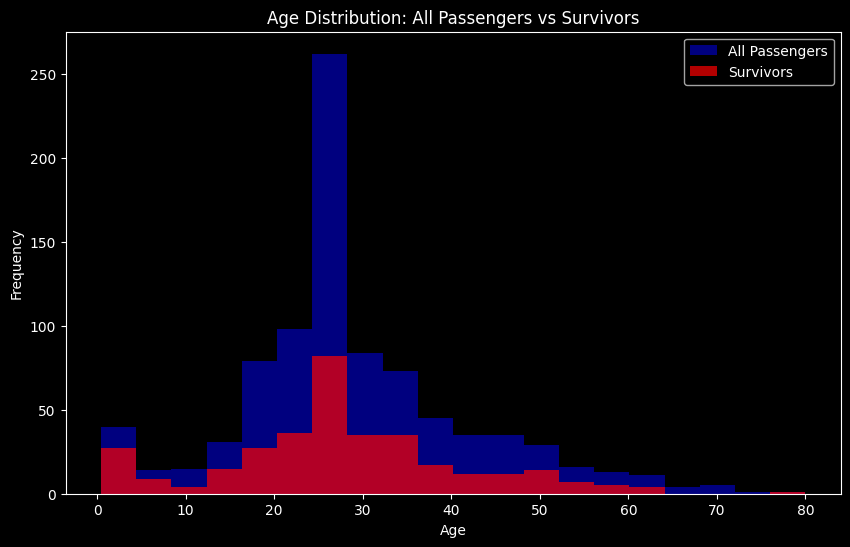

In [5]:
# Handle missing Age values by imputing with median
df['Age_filled'] = df['age'].fillna(df['age'].median())

plt.figure(figsize=(10, 6))
plt.hist(df['Age_filled'], bins=20, alpha=0.5, label='All Passengers', color='blue')
plt.hist(df[df['survived'] == 1]['Age_filled'], bins=20, alpha=0.7, 
         color='red', label='Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution: All Passengers vs Survivors')
plt.legend()
plt.show()

## 4. Embarkation Port: Seaborn's Pointplot

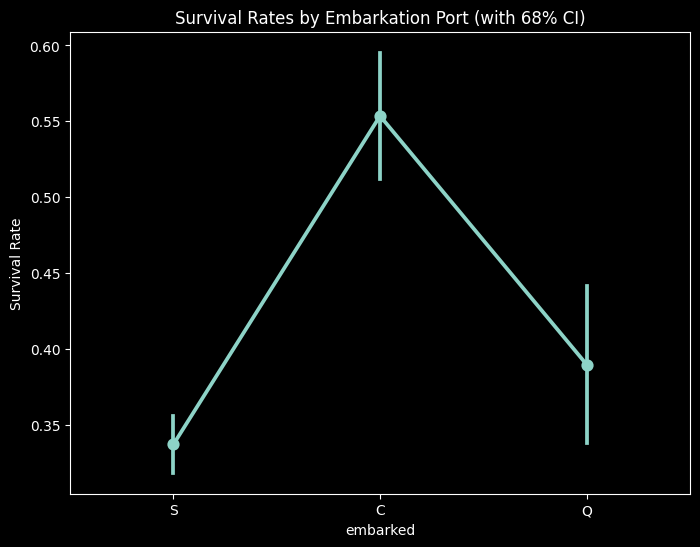

Port statistics (mean, std, count):
              mean       std  count
embarked                           
C         0.553571  0.498608    168
Q         0.389610  0.490860     77
S         0.336957  0.473037    644


In [6]:
# Handle missing Embarked values
df_embarked = df.dropna(subset=['embarked'])

plt.figure(figsize=(8, 6))
sns.pointplot(x='embarked', y='survived', data=df_embarked, errorbar=('ci', 68))
plt.title('Survival Rates by Embarkation Port (with 68% CI)')
plt.ylabel('Survival Rate')
plt.show()

# Check which port has highest uncertainty
port_stats = df_embarked.groupby('embarked')['survived'].agg(['mean', 'std', 'count'])
print("Port statistics (mean, std, count):")
print(port_stats)

## 5. Fare vs. Survival: Matplotlib's Scatter Plot

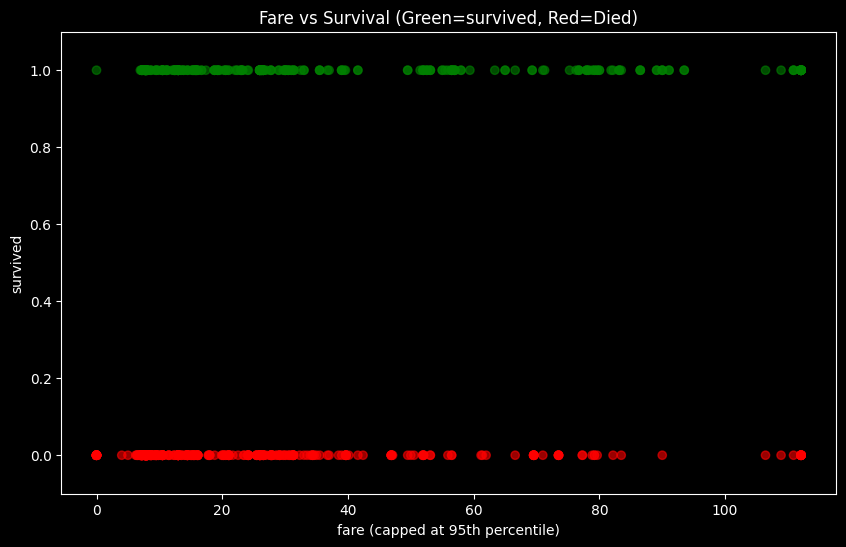

In [7]:
# Handle outliers by capping at 95th percentile
fare_cap = df['fare'].quantile(0.95)
df['Fare_capped'] = df['fare'].clip(upper=fare_cap)

plt.figure(figsize=(10, 6))
colors = ['red' if x == 0 else 'green' for x in df['survived']]
plt.scatter(df['Fare_capped'], df['survived'], c=colors, alpha=0.6)
plt.xlabel('fare (capped at 95th percentile)')
plt.ylabel('survived')
plt.ylim(-0.1, 1.1)
plt.title('Fare vs Survival (Green=survived, Red=Died)')
plt.show()

## 6. Cabin Class: Seaborn's Catplot

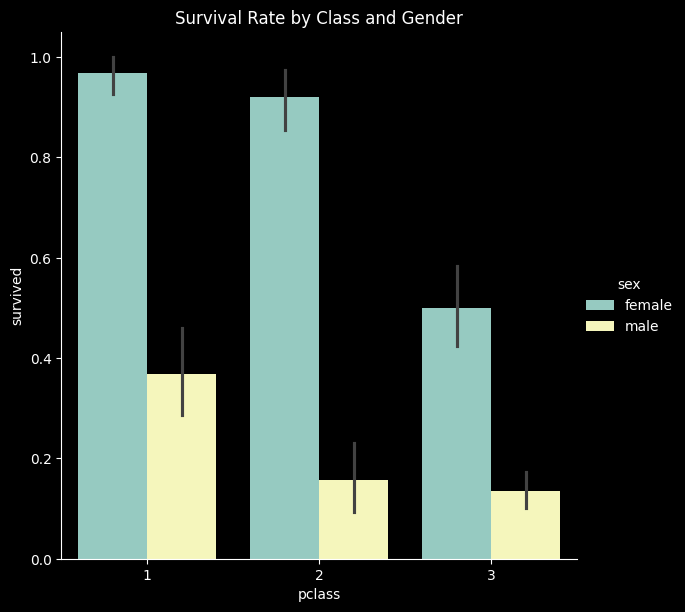

In [8]:
sns.catplot(x='pclass', y='survived', hue='sex', kind='bar', data=df, height=6)
plt.title('Survival Rate by Class and Gender')
plt.show()

## 7. Age vs. Survival: Violin Plot

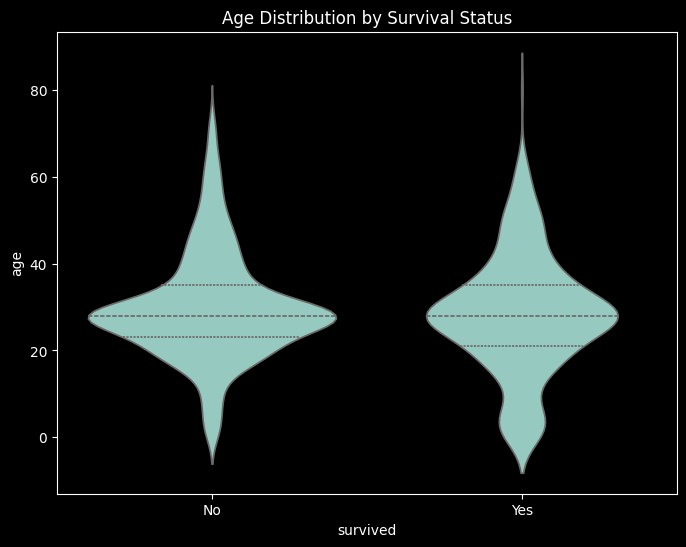

In [9]:
# Convert Survived to categorical for violin plot
df['Survived_cat'] = df['survived'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived_cat', y='Age_filled', data=df, inner='quartiles')
plt.title('Age Distribution by Survival Status')
plt.xlabel('survived')
plt.ylabel('age')
plt.show()

## 8. Correlation Matrix: Seaborn's Heatmap

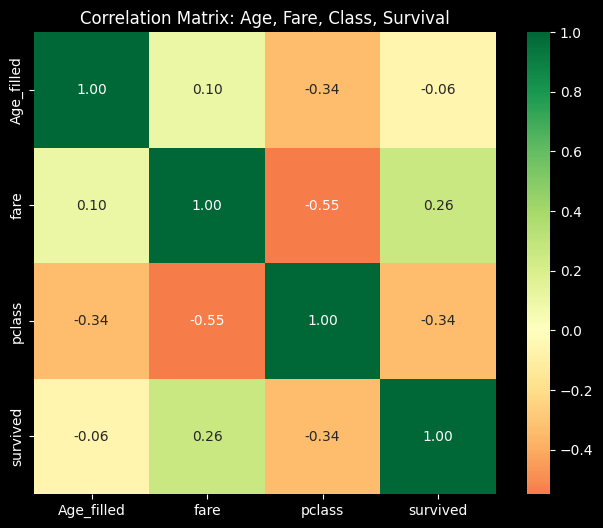

In [10]:
# Select numerical columns for correlation
corr_data = df[['Age_filled', 'fare', 'pclass', 'survived']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='RdYlGn', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix: Age, Fare, Class, Survival')
plt.show()

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_filled,Fare_capped,Survived_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,22.0,7.2500,No
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,71.2833,Yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,26.0,7.9250,Yes
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,53.1000,Yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,35.0,8.0500,No


## 9. Survival Rate by Family Size: Matplotlib's Grouped Bar

Family size range: 1 to 11


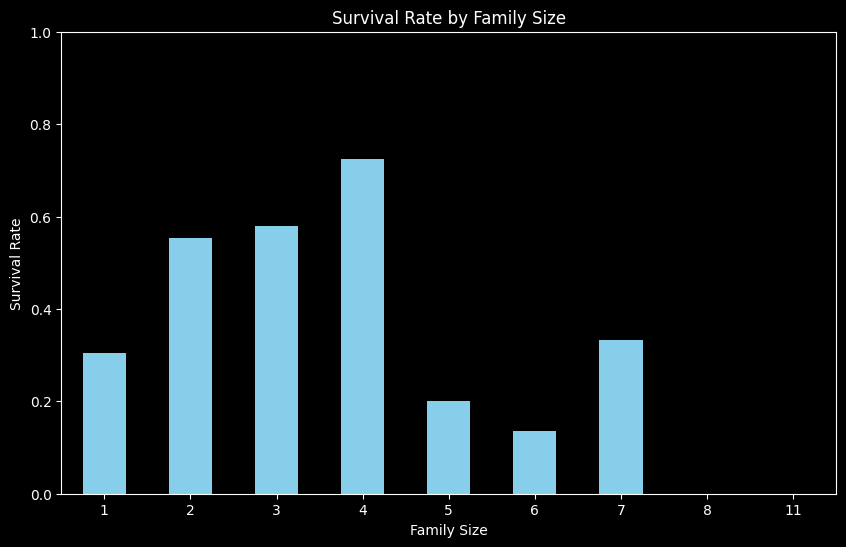


Family size distribution:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


In [12]:
# Create FamilySize feature
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

# Handle FamilySize=0 (shouldn't exist since we add 1, but check)
print(f"Family size range: {df['FamilySize'].min()} to {df['FamilySize'].max()}")

# Calculate survival rates by family size
family_survival = df.groupby('FamilySize')['survived'].mean()

plt.figure(figsize=(10, 6))
family_survival.plot(kind='bar', color='skyblue')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

# Show family size distribution
print("\nFamily size distribution:")
print(df['FamilySize'].value_counts().sort_index())

## Summary of Key Insights

1. **Class matters**: Higher class passengers had better survival rates
2. **Gender bias**: Women had significantly higher survival rates
3. **Age factor**: Children and younger adults had better survival chances
4. **Port differences**: Embarkation port shows varying survival rates with different uncertainties
5. **Fare correlation**: Higher fares generally correlate with better survival
6. **Family size effect**: Medium-sized families had optimal survival rates